In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import uproot
import pandas as pd

In [2]:
tree = 'vertex_tree;3'
branch_names = ['run_number','subrun_number','event_number','reco_asso_tracks',
                'reco_asso_showers','reco_shower_length','reco_shower_opening_angle',
                'reco_shower_energy_max','reco_shower_dEdx_plane2_max',
                'reco_shower_dirx','reco_shower_diry','reco_shower_dirz',
                'reco_vertex_x','reco_vertex_y','reco_vertex_z',
                'reco_shower_startx','reco_shower_starty','reco_shower_startz']

num_tracks =0 
num_showers = 1
length_cut = 0

In [3]:
tree_dm = uproot.open("./vertexed_singlephoton_20200902T013600_hist.root")["singlephotonana/vertex_tree;3"]
dm_df = tree_dm.pandas.df(branch_names)
print("Number of entries pre-cut: ", len(dm_df))

#One shower cut 
dm_df = dm_df[dm_df['reco_asso_tracks']  == num_tracks]
dm_df = dm_df[dm_df['reco_asso_showers'] == num_showers]

# Add direction and distance to vertex
dir_vect = [0.462372,
0.0488541,
0.885339
]

dm_df['shower_dir'] = dm_df['reco_shower_dirx']*dir_vect[0] + dm_df['reco_shower_diry']*dir_vect[1] + dm_df['reco_shower_dirz']*dir_vect[2]
dm_df['vertex_distance'] = np.sqrt( (dm_df['reco_vertex_x'] - dm_df['reco_shower_startx'])**2 +
                                    (dm_df['reco_vertex_y'] - dm_df['reco_shower_starty'])**2 +
                                    (dm_df['reco_vertex_z'] - dm_df['reco_shower_startz'])**2)

# Shower length cut 

#dm_df = dm_df[dm_df['reco_shower_length'] >= length_cut]

# Shower dir cut

#dm_df = dm_df[dm_df['shower_dir'] >= 0.99]

dm_df['class'] = 1

#dm_df = dm_df.sample(800)
print('Number of entries after cut: ',len(dm_df))

Number of entries pre-cut:  23828
Number of entries after cut:  9303


In [4]:
dm_df.head()

,,run_number,subrun_number,event_number,reco_asso_tracks,reco_asso_showers,reco_shower_length,reco_shower_opening_angle,reco_shower_energy_max,reco_shower_dEdx_plane2_max,reco_shower_dirx,...,reco_shower_dirz,reco_vertex_x,reco_vertex_y,reco_vertex_z,reco_shower_startx,reco_shower_starty,reco_shower_startz,shower_dir,vertex_distance,class
entry,subentry,,,,,,,,,,,,,,,,,,,,,
8,0,367,0,9,0,1,114.847656,0.254909,683.102580,4.212587,0.216855,...,0.976185,230.911423,-95.840240,298.426758,231.024673,-95.851639,298.399994,0.964224,0.116927,1
9,0,367,0,10,0,1,191.588135,0.068914,597.331806,9.859577,0.492988,...,0.860280,64.342659,-63.278904,394.319702,64.380569,-63.115871,394.300018,0.995931,0.168536,1
10,0,367,0,11,0,1,121.491280,0.165912,628.194155,11.424981,0.475601,...,0.878410,12.502875,6.879325,87.916634,16.733986,6.252750,96.250000,0.999886,9.366957,1
11,0,367,0,12,0,1,220.083008,0.111194,638.558551,4.253921,0.524407,...,0.849302,77.835762,93.315628,599.131226,77.950966,93.461517,599.299988,0.997356,0.251070,1
12,0,367,0,13,0,1,280.591675,0.092344,1092.059644,9.597985,0.474965,...,0.879253,156.196289,17.724527,370.792450,156.535904,18.115835,371.049988,0.999824,0.578607,1


In [5]:
tree_ncpi0_fhc = uproot.open("./ana_sp_ncpi0_fhc.root")["singlephotonana;1/vertex_tree;1"]
ncpi0_fhc_df = tree_ncpi0_fhc.pandas.df(branch_names)
print("NCPI0 FHC number of entries pre-cut: ", len(ncpi0_fhc_df))

#One shower cut 
ncpi0_fhc_df = ncpi0_fhc_df[ncpi0_fhc_df['reco_asso_tracks']  == num_tracks]
ncpi0_fhc_df = ncpi0_fhc_df[ncpi0_fhc_df['reco_asso_showers'] == num_showers]

# Add direction and distance to vertex
dir_vect = [0.462372,
0.0488541,
0.885339
]

ncpi0_fhc_df['shower_dir'] = ncpi0_fhc_df['reco_shower_dirx']*dir_vect[0] + ncpi0_fhc_df['reco_shower_diry']*dir_vect[1] + ncpi0_fhc_df['reco_shower_dirz']*dir_vect[2]
ncpi0_fhc_df['vertex_distance'] = np.sqrt( (ncpi0_fhc_df['reco_vertex_x'] - ncpi0_fhc_df['reco_shower_startx'])**2 +
                                    (ncpi0_fhc_df['reco_vertex_y'] - ncpi0_fhc_df['reco_shower_starty'])**2 +
                                    (ncpi0_fhc_df['reco_vertex_z'] - ncpi0_fhc_df['reco_shower_startz'])**2)

# Shower length cut 


# Shower dir cut

#ncpi0_df = ncpi0_df[ncpi0_df['shower_dir'] >= 0.99]

#ncpi0_df = ncpi0_df[ncpi0_df['reco_shower_length'] >= length_cut]

ncpi0_fhc_df['class'] = 0
print('NCPI0 FHC number of entries after cut: ',len(ncpi0_fhc_df))

NCPI0 FHC number of entries pre-cut:  43397
NCPI0 FHC number of entries after cut:  2190


In [6]:
tree_ncpi0_rhc = uproot.open("./ana_sp_ncpi0_rhc.root")["singlephotonana;1/vertex_tree;1"]
ncpi0_rhc_df = tree_ncpi0_rhc.pandas.df(branch_names)
print("NCPI0 rhc number of entries pre-cut: ", len(ncpi0_rhc_df))

#One shower cut 
ncpi0_rhc_df = ncpi0_rhc_df[ncpi0_rhc_df['reco_asso_tracks']  == num_tracks]
ncpi0_rhc_df = ncpi0_rhc_df[ncpi0_rhc_df['reco_asso_showers'] == num_showers]

# Add direction and distance to vertex
dir_vect = [0.462372,
0.0488541,
0.885339
]

ncpi0_rhc_df['shower_dir'] = ncpi0_rhc_df['reco_shower_dirx']*dir_vect[0] + ncpi0_rhc_df['reco_shower_diry']*dir_vect[1] + ncpi0_rhc_df['reco_shower_dirz']*dir_vect[2]
ncpi0_rhc_df['vertex_distance'] = np.sqrt( (ncpi0_rhc_df['reco_vertex_x'] - ncpi0_rhc_df['reco_shower_startx'])**2 +
                                    (ncpi0_rhc_df['reco_vertex_y'] - ncpi0_rhc_df['reco_shower_starty'])**2 +
                                    (ncpi0_rhc_df['reco_vertex_z'] - ncpi0_rhc_df['reco_shower_startz'])**2)

# Shower length cut 


# Shower dir cut

#ncpi0_df = ncpi0_df[ncpi0_df['shower_dir'] >= 0.99]

#ncpi0_df = ncpi0_df[ncpi0_df['reco_shower_length'] >= length_cut]

ncpi0_rhc_df['class'] = 0
print('NCPI0 rhc number of entries after cut: ',len(ncpi0_rhc_df))

NCPI0 rhc number of entries pre-cut:  47766
NCPI0 rhc number of entries after cut:  2192


In [7]:
ncpi0_fhc_df.head()

,,run_number,subrun_number,event_number,reco_asso_tracks,reco_asso_showers,reco_shower_length,reco_shower_opening_angle,reco_shower_energy_max,reco_shower_dEdx_plane2_max,reco_shower_dirx,...,reco_shower_dirz,reco_vertex_x,reco_vertex_y,reco_vertex_z,reco_shower_startx,reco_shower_starty,reco_shower_startz,shower_dir,vertex_distance,class
entry,subentry,,,,,,,,,,,,,,,,,,,,,
4,0,1,728,51,0,1,244.042877,0.054742,292.847770,5.261677,0.146270,...,0.621740,103.867355,-44.817677,849.887512,103.849838,-44.756149,849.899963,0.655672,0.065173,0
9,0,1,727,67,0,1,33.351795,0.166225,156.732073,5.368807,-0.142760,...,-0.973073,61.522648,80.795494,227.292023,54.867767,88.092155,174.000000,-0.936349,54.199339,0
11,0,1,722,15,0,1,113.587265,0.172333,365.978978,2.930566,0.420905,...,0.388347,200.167938,-49.482430,731.675293,200.898972,-48.913063,739.299988,0.498384,7.680792,0
30,0,1,2304,9,0,1,41.740528,0.246203,179.813041,4.375613,0.476813,...,0.408402,95.569611,56.640427,820.177002,97.222549,58.647301,820.299988,0.620066,2.602859,0
47,0,1,2306,92,0,1,57.489441,0.288634,358.181401,5.852369,0.270234,...,0.901566,35.582329,26.047256,958.517212,35.598991,25.911535,958.500000,0.939646,0.137819,0


In [8]:
# Combine signal and background datasets
df = ncpi0_fhc_df.append(dm_df)
df = df.append(ncpi0_rhc_df)
df = df.sample(frac =1).reset_index(drop=True) # Shuffle 

y_df = df.pop('class')

In [9]:
df.head()

,run_number,subrun_number,event_number,reco_asso_tracks,reco_asso_showers,reco_shower_length,reco_shower_opening_angle,reco_shower_energy_max,reco_shower_dEdx_plane2_max,reco_shower_dirx,reco_shower_diry,reco_shower_dirz,reco_vertex_x,reco_vertex_y,reco_vertex_z,reco_shower_startx,reco_shower_starty,reco_shower_startz,shower_dir,vertex_distance
0,353,0,29,0,1,212.035995,0.044375,236.743518,4.372132,0.454128,-0.053805,0.889310,199.616959,51.667683,184.825180,199.530075,52.238705,184.899994,0.994689,0.582419
1,1,2090,74,0,1,104.408203,0.305175,504.183905,12.470993,0.892817,0.146456,0.425943,57.124809,6.273636,440.147461,57.626907,6.345241,440.510193,0.797073,0.623542
2,258,0,10,0,1,124.190277,0.161707,881.011509,4.107287,0.549272,0.106593,0.828818,153.984451,-41.125751,183.689484,154.319427,-42.087841,183.550003,0.992960,1.028241
3,86,0,39,0,1,212.205688,0.115423,890.035372,3.788847,0.464832,0.059708,0.883383,64.830513,-19.743372,110.095566,64.986588,-19.320536,110.050003,0.999936,0.453018
4,373,0,7,0,1,159.770691,0.029391,2186.872239,6.701179,0.465431,0.078148,0.881628,201.936142,12.694302,188.334839,202.011017,12.690687,188.473679,0.999559,0.157784


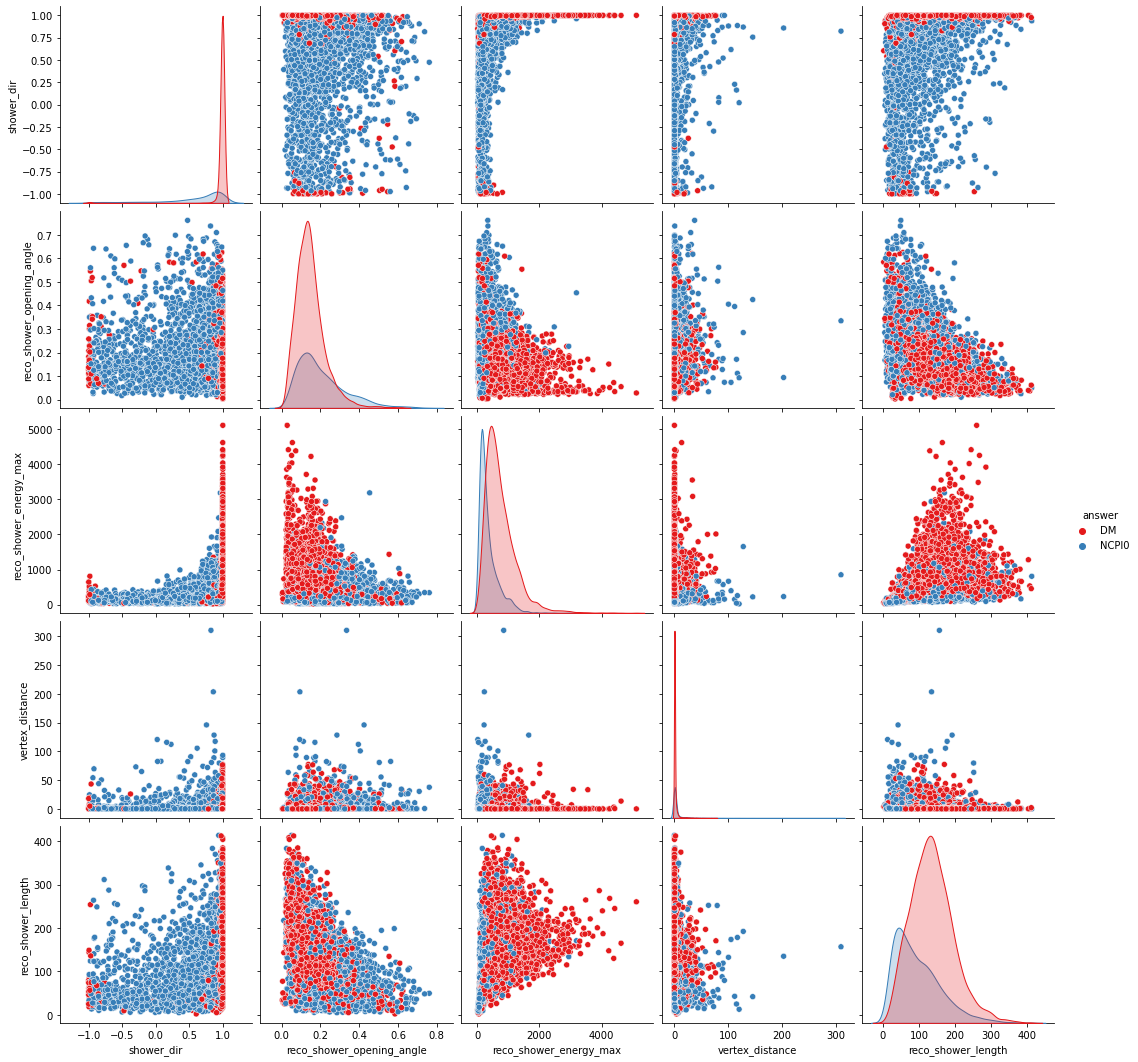

In [10]:
variables = names = ['shower_dir','reco_shower_opening_angle',
                'reco_shower_energy_max','vertex_distance','reco_shower_length']
df['answer'] = 'NCPI0'
df.loc[y_df == 1,'answer'] = 'DM'
df['answer'] = df['answer'].astype('category')

g=sns.pairplot(df.head(10000),vars=variables,hue='answer',palette='Set1',height=3)

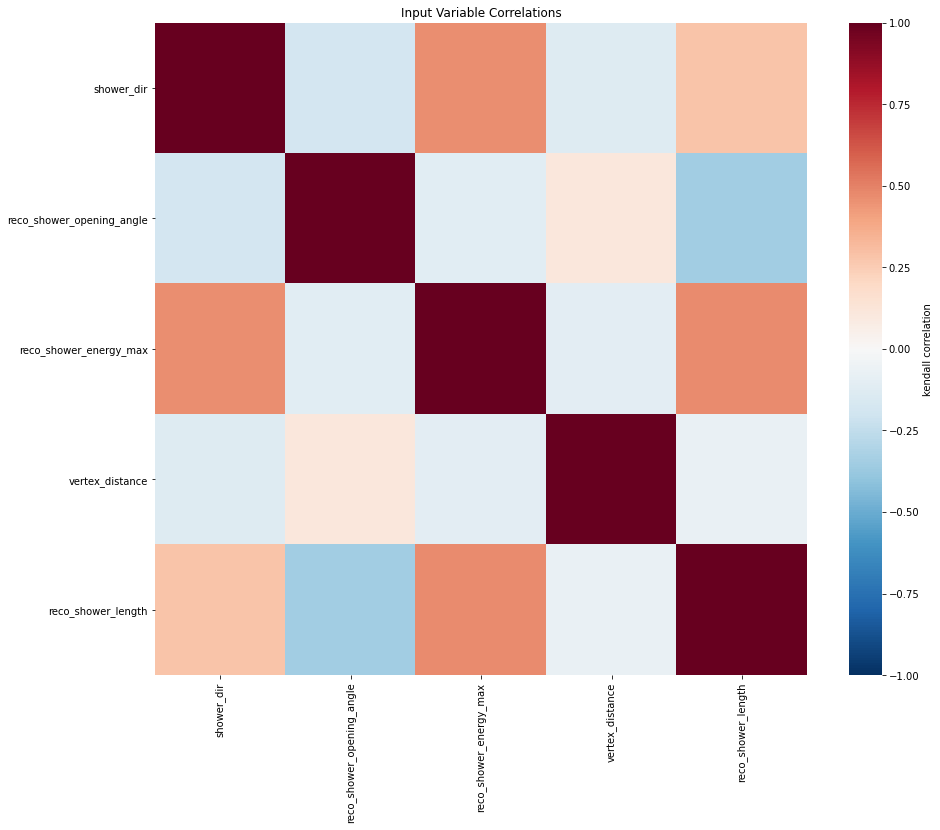

In [11]:
method = 'kendall'
correlations = df[variables].astype(np.float64).corr(method=method)
plt.figure(figsize=(15,12))
sns.heatmap(correlations,vmin=-1,annot=False,square=True,cbar_kws={'label':method+' correlation'},cmap = 'RdBu_r')
plt.title('Input Variable Correlations')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_unscaled = np.array(df[variables])
Y = np.array(y_df)

# Split data into training and test set (70/30); shuffle order 
# Stratify ensures train and test split preserves percentage of samples in each class

x_train_unscaled, x_test_unscaled, y_train, y_test = train_test_split(X_unscaled,Y,test_size = 0.3
                                                                    ,random_state = 0, shuffle = True,
                                                                    stratify =Y)

# Perform initial transformations  - StandardScaler - set mean of each feature to 0, std to 1

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train_unscaled)
x_test = scaler.transform(x_test_unscaled)
X = scaler.transform(X_unscaled)



In [13]:
# sklearn BDT 
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier 
from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score
import sklearn.tree as sk_tree


# Make the classifier (single decision tree) 
DTC  = sk_tree.DecisionTreeClassifier(max_depth=3,min_samples_split = 10)

# Combine a bunch of decision trees, number set by n_estimators 
# The specific way samples are re-weighted is controlled by the AdaBoost algorithm 

BDT = AdaBoostClassifier(base_estimator = DTC, n_estimators = 100, algorithm = 'SAMME')

# Train the BDT 
model = BDT.fit(x_train_unscaled,y_train)

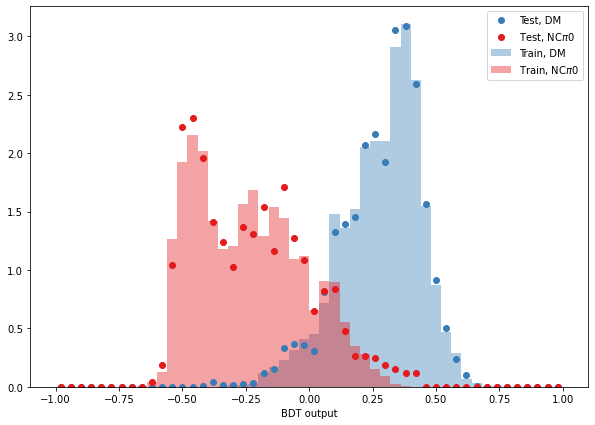

In [14]:
# Evaluate the BDT on the test (and train) data

y_pred_test = model.decision_function(x_test_unscaled)
y_pred_DM_train = model.decision_function(x_train_unscaled[y_train==1])
y_pred_DM_test = model.decision_function(x_test_unscaled[y_test==1])

y_pred_NCPI0_train = model.decision_function(x_train_unscaled[y_train==0])
y_pred_NCPI0_test = model.decision_function(x_test_unscaled[y_test==0])


n_bins = 50
hist_range = (-1.,1.)

DM_color = sns.color_palette("Set1")[1]
NCPI0_color = sns.color_palette("Set1")[0]
plt.figure(figsize=(10,7))
plt.hist(y_pred_DM_train,bins=n_bins, range=hist_range, density=True,alpha=0.4,color=DM_color,label='Train, DM' )
counts,bin_edges = np.histogram(y_pred_DM_test,bins=n_bins,range=hist_range,density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
plt.plot(bin_centers,counts,marker='o',linestyle="None",color=DM_color,label='Test, DM')


plt.hist(y_pred_NCPI0_train, bins = n_bins, range = hist_range, density = True, alpha = 0.4, color = NCPI0_color, label = r'Train, NC$\pi$0')
counts,bin_edges = np.histogram(y_pred_NCPI0_test,bins = n_bins, range= hist_range,density = True)
bin_centers = (bin_edges[:-1] +  bin_edges[1:])/2.
plt.plot(bin_centers,counts,marker='o',linestyle ="None",color=NCPI0_color,label = r'Test, NC$\pi$0')

plt.legend()
plt.xlabel('BDT output')
plt.show()


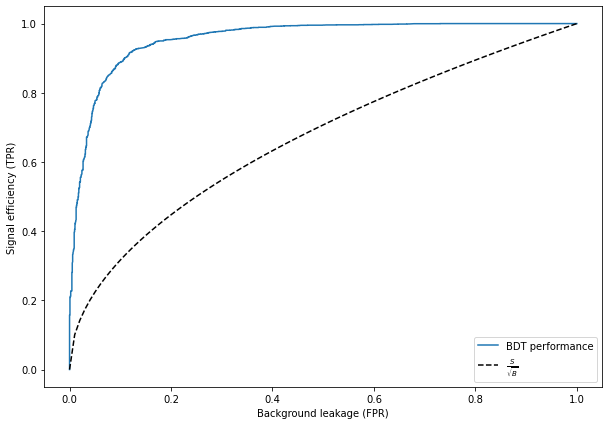

In [15]:
# Use the test data
BDT_FPR_test, BDT_TPR_test, BDT_TH_test = roc_curve(y_test,y_pred_test,pos_label = 1) #Signal class set to 1

plt.figure(figsize=(10,7))
plt.plot(BDT_FPR_test,BDT_TPR_test, label = 'BDT performance')
plt.xlabel('Background leakage (FPR)')
plt.ylabel('Signal efficiency (TPR)')

n_pts = 100
bkg_eff = np.linspace(0,1,n_pts)
sig_fixed = np.sqrt(bkg_eff)
plt.plot(bkg_eff, sig_fixed, label = r'$\frac{S}{\sqrt{B}}$', color = 'black', linestyle = '--')
plt.legend()
plt.show()

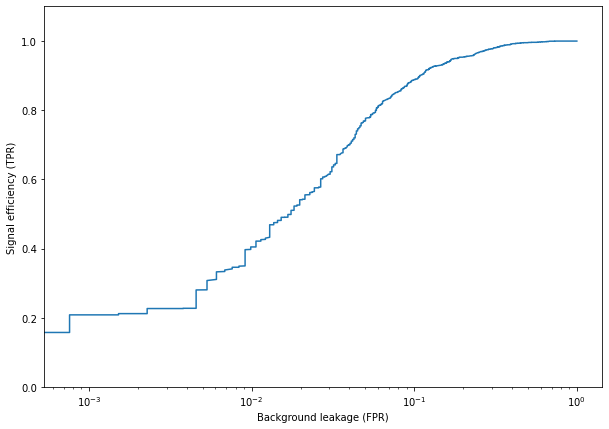

In [16]:
plt.figure(figsize=(10,7))
plt.plot(BDT_FPR_test, BDT_TPR_test, label="BDT performance")
plt.xscale('log')
plt.ylim((0.,1.1))
plt.xlabel('Background leakage (FPR)')
plt.ylabel('Signal efficiency (TPR)')
plt.show()

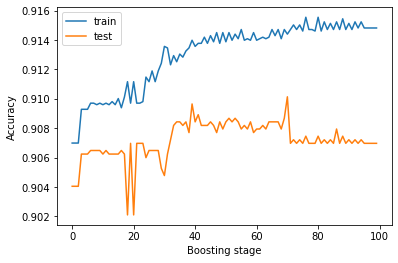

In [17]:
# Get accuracy, ROC AUC vs boosting stage, i.e. number of trees
test_acc, train_acc = [], []
test_auc, train_auc = [], []
for train_predict in model.staged_predict(x_train_unscaled):
    train_acc.append(accuracy_score(y_train, train_predict)) # Can add sample weights here
    
for train_predict in model.staged_decision_function(x_train_unscaled):
    train_auc.append(roc_auc_score(y_train, train_predict))
    
for test_predict in model.staged_predict(x_test_unscaled):
    test_acc.append(accuracy_score(y_test, test_predict)) # Can add sample weights here
    
for test_predict in model.staged_decision_function(x_test_unscaled):
    test_auc.append(roc_auc_score(y_test, test_predict))
    
plt.plot(train_acc,label="train")
plt.plot(test_acc,label="test")
plt.xlabel("Boosting stage")
plt.ylabel("Accuracy")
#plt.ylim(0.7,0.8)
plt.legend()
plt.show()

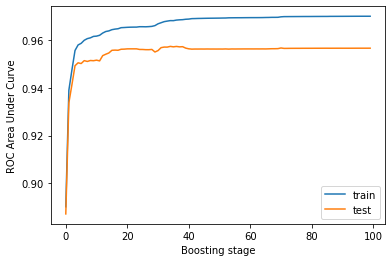

In [18]:
plt.plot(train_auc,label="train")
plt.plot(test_auc,label="test")
plt.xlabel("Boosting stage")
plt.ylabel("ROC Area Under Curve")
plt.legend()
plt.show()

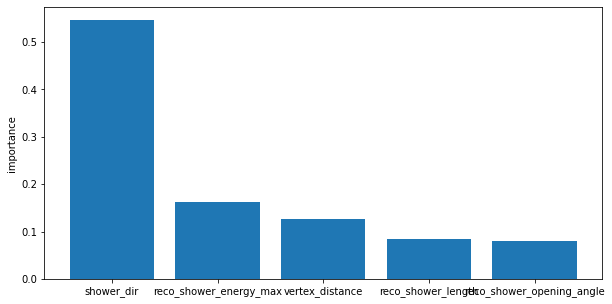

In [19]:
# Get feature ranking
importances = np.array(list(zip(variables, model.feature_importances_)))
# Sort in order of importance (then reverse so most important is first)
importances = importances[importances[:, 1].argsort()]
importances = importances[::-1]

# Plot variable importances
plt.figure(figsize=(10,5))
plt.bar(importances[:,0],importances[:,1].astype(float),bottom=0)
plt.ylabel("importance")
plt.show()

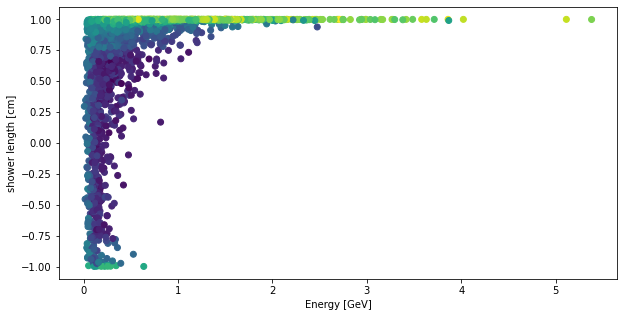

In [20]:
plt.figure(figsize=(10,5))
plt.scatter(x_test_unscaled[:,2]/1000,x_test_unscaled[:,0],c=y_pred_test)
plt.xlabel('Energy [GeV]')
plt.ylabel('shower length [cm]')
plt.show()

In [21]:
import xgboost
dtrain = xgboost.DMatrix(x_train_unscaled, label = y_train)
dtest = xgboost.DMatrix(x_test_unscaled, label = y_test)
#wpos = (y_train * w_train).sum()
#wneg = ((1-y_train) * w_train).sum()

param = {'max_depth':4, # The trees will grow to this depth, so maximum 2^6 leaves
         'eta':.3, #shrink the weight of each stage by this amount (geometric series)
         'objective':'binary:logistic', # Probably don't mess with this
         'subsample':0.8, #"Bagging" by randomly sampling rows with replacement this fraction of events in each stage. 
         'colsample_bylevel':1, #if you want to use "Random Forests" which resample on the columns, change to a number in [0,1]. 
                                 #Change "bylevel" to "bytree" or "bynode" to change when this resampling occurs (stage, depth, or node)
         'min_split_loss':1, #This is "Gamma" in the XGBoost paper, a proposed split needs to improve the loss function by this amount 
         'lambda':1, #L2 regularization. Can think of this as preventing the BDT from separating leaf too aggressively. 
                     #Probably don't need to tweak too much, the topological regularizers tend to have bigger effects. 
         #'monotone_constraints': '(-1,0,0)' # this one is really cool. If you know that you want the classifier
                                             #to generally increase (decrease) in a given direction, you can specify it,
                                             #and then the output will be monotonically increasing (decreasing)
        #'scale_pos_weight':max(wneg,wpos)/min(wpos, wneg)
         'learning_rate': 0.075,
         'gamma': 6.0
        }

num_round = 100 #maximum number of rounds
progress = dict()
watchlist =  [ (dtrain, 'train'),(dtest, 'validation')] #as it is training, the BDT will evaluate on these datasets
bst = xgboost.train(param, dtrain, num_round,
                    evals = watchlist,
                    verbose_eval = 5 ,
                   # early_stopping_rounds = 50, #You can set this to stop training when the validation set starts to turn over (overtraining is occurring)
                    evals_result=progress)
for x in ['gain', 'weight', 'cover', 'total_gain', 'total_cover']:
    print('feature %s : %s'%(x,bst.get_score(importance_type = x)))
#save the model! This will allow us to read it back in later
bst.save_model('fb_bdt.xgb')



[0]	train-error:0.09041	validation-error:0.09182
[5]	train-error:0.08780	validation-error:0.08816
[10]	train-error:0.08717	validation-error:0.08792
[15]	train-error:0.08644	validation-error:0.08865
[20]	train-error:0.08571	validation-error:0.08865
[25]	train-error:0.08498	validation-error:0.08914
[30]	train-error:0.08383	validation-error:0.08865
[35]	train-error:0.08446	validation-error:0.08816
[40]	train-error:0.08352	validation-error:0.08889
[45]	train-error:0.08289	validation-error:0.08816
[50]	train-error:0.08331	validation-error:0.08889
[55]	train-error:0.08258	validation-error:0.08816
[60]	train-error:0.08205	validation-error:0.08865
[65]	train-error:0.08164	validation-error:0.08841
[70]	train-error:0.08049	validation-error:0.08914
[75]	train-error:0.07976	validation-error:0.08889
[80]	train-error:0.07882	validation-error:0.08889
[85]	train-error:0.07746	validation-error:0.08792
[90]	train-error:0.07663	validation-error:0.08670
[95]	train-error:0.07610	validation-error:0.08695
[9

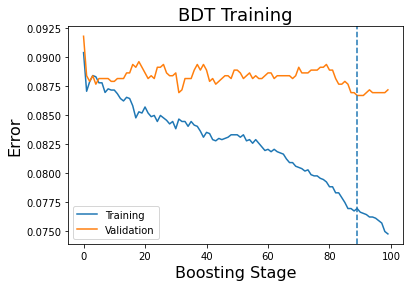

In [22]:
plt.plot(progress['train']['error'], label='Training')
plt.plot(progress['validation']['error'], label ='Validation')
plt.axvline(np.argmin(progress['validation']['error']), ls = '--')
plt.xlabel('Boosting Stage', fontsize = 16)
plt.ylabel('Error', fontsize = 16)
plt.title('BDT Training', fontsize = 18)
plt.legend()

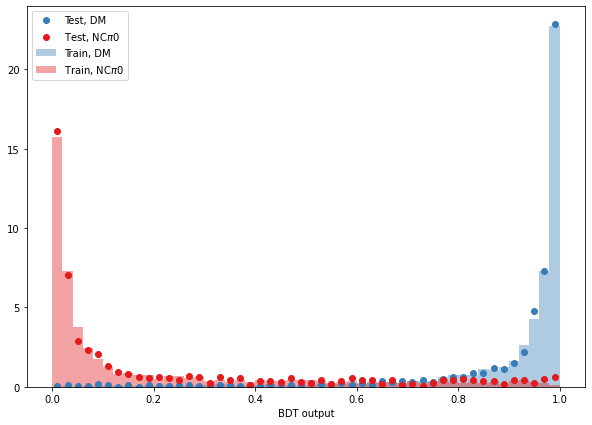

In [23]:
# Evaluate the BDT on the test (and train) data

y_pred_test = bst.predict(dtest)
y_pred_train = bst.predict(dtrain)
y_pred_DM_train = y_pred_train[y_train==1]
y_pred_DM_test = y_pred_test[y_test==1]
y_pred_NCPI0_train = y_pred_train[y_train==0]
y_pred_NCPI0_test = y_pred_test[y_test==0]

n_bins = 50
hist_range = (0.,1.)

DM_color = sns.color_palette("Set1")[1]
NCPI0_color = sns.color_palette("Set1")[0]
plt.figure(figsize=(10,7))
plt.hist(y_pred_DM_train,bins=n_bins, range=hist_range, density=True,alpha=0.4,color=DM_color,label='Train, DM' )
counts,bin_edges = np.histogram(y_pred_DM_test,bins=n_bins,range=hist_range,density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
plt.plot(bin_centers,counts,marker='o',linestyle="None",color=DM_color,label='Test, DM')


plt.hist(y_pred_NCPI0_train, bins = n_bins, range = hist_range, density = True, alpha = 0.4, color = NCPI0_color, label = r'Train, NC$\pi$0')
counts,bin_edges = np.histogram(y_pred_NCPI0_test,bins = n_bins, range= hist_range,density = True)
bin_centers = (bin_edges[:-1] +  bin_edges[1:])/2.
plt.plot(bin_centers,counts,marker='o',linestyle ="None",color=NCPI0_color,label = r'Test, NC$\pi$0')

plt.legend()
plt.xlabel('BDT output')
plt.show()


In [24]:
alpha = 1- np.sum(y_pred_DM_test)/len(y_pred_DM_test)
beta =  np.sum(y_pred_NCPI0_test)/len(y_pred_NCPI0_test)
print('Misclassification: %.3f %.3f'%(alpha, beta))

Misclassification: 0.094 0.206


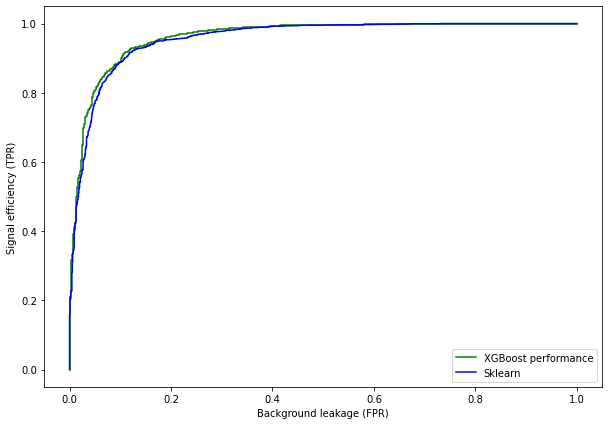

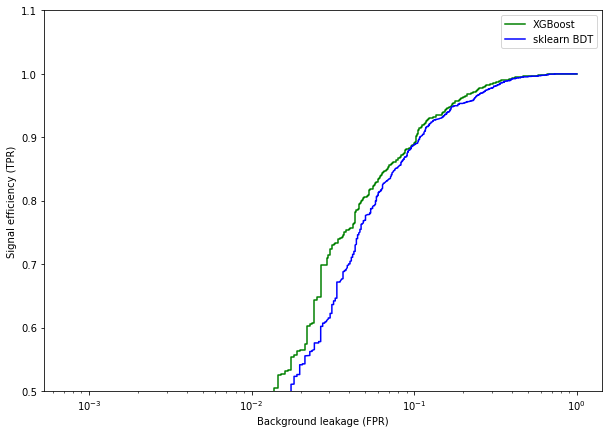

In [25]:
XGB_FPR_test, XGB_TPR_test, XGB_TH_test = roc_curve(y_test, y_pred_test, pos_label=1) # Signal class set to 1
plt.figure(figsize=(10,7))
plt.plot(XGB_FPR_test, XGB_TPR_test, label="XGBoost performance",color='green')
plt.plot(BDT_FPR_test,BDT_TPR_test,label = "Sklearn",color='blue')
plt.xlabel('Background leakage (FPR)')
plt.ylabel('Signal efficiency (TPR)')

#n_pts = 100
#bkg_eff = np.linspace(0,1,n_pts)
#sig_fixed = np.sqrt(bkg_eff)
#plt.plot(bkg_eff, sig_fixed, label="Const sig/sqrt(bkg)", color='black')
plt.legend()
plt.show()

plt.figure(figsize=(10,7))
plt.plot(XGB_FPR_test, XGB_TPR_test, label="XGBoost", color='green')
#plt.plot(N, label="NN (weighted)", color='orange')
plt.plot(BDT_FPR_test,BDT_TPR_test, label="sklearn BDT", color='blue')
plt.xscale('log')
plt.ylim((0.5,1.1))
plt.xlabel('Background leakage (FPR)')
plt.ylabel('Signal efficiency (TPR)')
plt.legend()
plt.show()

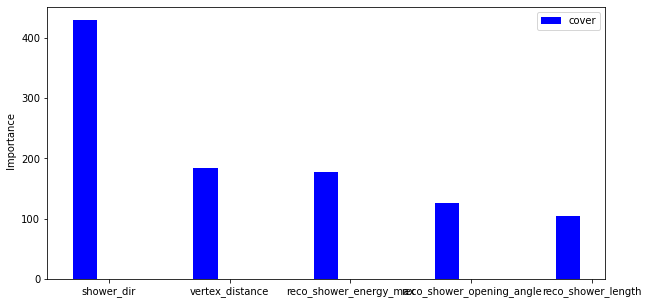

In [26]:
# Get feature ranking
index = np.arange(len(variables))
bar_width = .2
# Sort in order of importance (then reverse so most important is first)
sorted_order = None
# Plot variable importances
plt.figure(figsize=(10,5))
plt.ylabel(" Importance")
colors = ['b', 'orange', 'g']
for k, importance in enumerate(['cover']):
    importances =  np.array(list(bst.get_score(importance_type = importance).values()))
#     importances
#     importances = importances / np.max(importances)
    if sorted_order is None:
        sorted_order = importances.argsort()[::-1]
    importances = importances[sorted_order]
    plt.bar(index + k*bar_width,importances.astype(float), bar_width,bottom=0, label = importance, color = colors[k] )
#     plt.gca().twinx()
plt.xticks(index + bar_width, np.array(variables)[sorted_order])
plt.legend(loc = 'best')
plt.show()

In [27]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
hyperparams = {
    'learning_rate': [.05, .075, .1, .125],
        'gamma': np.r_[2:7:.25],
        'subsample': np.r_[.8:1.01:.025],
#         'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [4, 6, 8,9,10]
        }
bst = xgboost.XGBClassifier(  **param,)
folds = 3
param_comb = 5
watchlist =  [
              (x_train_unscaled,y_train),
            (x_test_unscaled,y_test)]
fit_dict = {"eval_set": watchlist,
          "early_stopping_rounds":50,
          "eval_metric":"error","verbose":5}
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
X,Y = x_train_unscaled,y_train
random_search = RandomizedSearchCV(bst, param_distributions=hyperparams, n_iter=param_comb, scoring='roc_auc',
                                   n_jobs=1, cv=skf.split(X,Y), verbose=3, random_state=1001,
                                  )
random_search.fit(X, Y, **fit_dict)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] subsample=0.8, max_depth=4, learning_rate=0.075, gamma=6.0 ......
[0]	validation_0-error:0.09082	validation_1-error:0.09109
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[5]	validation_0-error:0.08874	validation_1-error:0.09011
[10]	validation_0-error:0.08790	validation_1-error:0.08792
[15]	validation_0-error:0.08832	validation_1-error:0.08938


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[20]	validation_0-error:0.08633	validation_1-error:0.08889
[25]	validation_0-error:0.08539	validation_1-error:0.08743
[30]	validation_0-error:0.08633	validation_1-error:0.08695
[35]	validation_0-error:0.08592	validation_1-error:0.08646
[40]	validation_0-error:0.08519	validation_1-error:0.08743
[45]	validation_0-error:0.08456	validation_1-error:0.08719
[50]	validation_0-error:0.08446	validation_1-error:0.08670
[55]	validation_0-error:0.08299	validation_1-error:0.08597
[60]	validation_0-error:0.08185	validation_1-error:0.08597
[65]	validation_0-error:0.08174	validation_1-error:0.08621
[70]	validation_0-error:0.08091	validation_1-error:0.08695
[75]	validation_0-error:0.08038	validation_1-error:0.08768
[80]	validation_0-error:0.07986	validation_1-error:0.08719
[85]	validation_0-error:0.07955	validation_1-error:0.08719
[90]	validation_0-error:0.07945	validation_1-error:0.08743
[95]	validation_0-error:0.07913	validation_1-error:0.08768
[99]	validation_0-error:0.07882	validation_1-error:0.087

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[0]	validation_0-error:0.08759	validation_1-error:0.08914
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[5]	validation_0-error:0.08769	validation_1-error:0.09036
[10]	validation_0-error:0.08811	validation_1-error:0.08792
[15]	validation_0-error:0.08717	validation_1-error:0.08816
[20]	validation_0-error:0.08633	validation_1-error:0.08743
[25]	validation_0-error:0.08550	validation_1-error:0.08792
[30]	validation_0-error:0.08519	validation_1-error:0.08889
[35]	validation_0-error:0.08539	validation_1-error:0.08841
[40]	validation_0-error:0.08529	validation_1-error:0.08816
[45]	validation_0-error:0.08456	validation_1-error:0.08792
[50]	validation_0-error:0.08446	validation_1-error:0.08792
[55]	validation_0-error:0.08425	validation_1-error:0.08841
[60]	validation_0-error:0.08289	validation_1-error:0.08865
[65]	validation_0-error:0.08237	validation_1-error:0.08889
[70]	validation

[10]	validation_0-error:0.06264	validation_1-error:0.09474
[15]	validation_0-error:0.05951	validation_1-error:0.09206
[20]	validation_0-error:0.05700	validation_1-error:0.09352
[25]	validation_0-error:0.05543	validation_1-error:0.09304
[30]	validation_0-error:0.05449	validation_1-error:0.09352
[35]	validation_0-error:0.05324	validation_1-error:0.09255
[40]	validation_0-error:0.05136	validation_1-error:0.09377
[45]	validation_0-error:0.05115	validation_1-error:0.09377
[50]	validation_0-error:0.05084	validation_1-error:0.09304
[55]	validation_0-error:0.05032	validation_1-error:0.09255
[60]	validation_0-error:0.04969	validation_1-error:0.09109
[65]	validation_0-error:0.04781	validation_1-error:0.09206
[70]	validation_0-error:0.04750	validation_1-error:0.09157
[75]	validation_0-error:0.04687	validation_1-error:0.09182
[80]	validation_0-error:0.04614	validation_1-error:0.09230
[85]	validation_0-error:0.04541	validation_1-error:0.09206
[90]	validation_0-error:0.04489	validation_1-error:0.092

[10]	validation_0-error:0.06013	validation_1-error:0.09255
[15]	validation_0-error:0.05825	validation_1-error:0.09352
[20]	validation_0-error:0.05627	validation_1-error:0.09255
[25]	validation_0-error:0.05460	validation_1-error:0.09352
[30]	validation_0-error:0.05272	validation_1-error:0.09279
[35]	validation_0-error:0.05074	validation_1-error:0.09425
[40]	validation_0-error:0.04948	validation_1-error:0.09377
[45]	validation_0-error:0.04886	validation_1-error:0.09352
[50]	validation_0-error:0.04875	validation_1-error:0.09328
[55]	validation_0-error:0.04687	validation_1-error:0.09352
[60]	validation_0-error:0.04593	validation_1-error:0.09352
Stopping. Best iteration:
[10]	validation_0-error:0.06013	validation_1-error:0.09255

[CV]  subsample=0.9750000000000002, max_depth=10, learning_rate=0.125, gamma=6.75, score=0.951, total=   0.2s
[0]	validation_0-error:0.09041	validation_1-error:0.09182
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Wi

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    4.5s finished


[70]	validation_0-error:0.08049	validation_1-error:0.08914
[75]	validation_0-error:0.07976	validation_1-error:0.08889
[80]	validation_0-error:0.07882	validation_1-error:0.08889
Stopping. Best iteration:
[31]	validation_0-error:0.08466	validation_1-error:0.08695



RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fdbe2fbbb30>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=1,
                                           colsample_bynode=None,
                                           colsample_bytree=None, eta=0.3,
                                           gamma=6.0, gpu_id=None,
                                           importance_type='gain',
                                           interaction_constraints=None,
                                           lambda=1, learning_rate=0.075,
                                           max_delta_step=None, max_depth=4,
                                           min_child_weight=N...
                                           validate_parameters=None,
                                           verbosity=None),
                   n_iter=5, n_jobs=1,
                   param_distributions={'gamma': arra

In [28]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)
best_xgb = random_search.best_estimator_
best_xgb.save_model('best_model.xgb')
progress = best_xgb.evals_result()


 All results:
{'mean_fit_time': array([0.24952857, 0.43863424, 0.30056429, 0.21457609, 0.2868952 ]), 'std_fit_time': array([0.10503271, 0.10116669, 0.05907255, 0.0468283 , 0.04763758]), 'mean_score_time': array([0.00327611, 0.00424099, 0.00413044, 0.00367498, 0.00348441]), 'std_score_time': array([0.00018978, 0.00122666, 0.00077109, 0.00079479, 0.000396  ]), 'param_subsample': masked_array(data=[0.8, 0.8250000000000001, 0.9750000000000002,
                   0.9750000000000002, 0.9750000000000002],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[4, 9, 10, 6, 10],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_learning_rate': masked_array(data=[0.075, 0.075, 0.1, 0.1, 0.125],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[6.0, 6.0, 3.5, 2

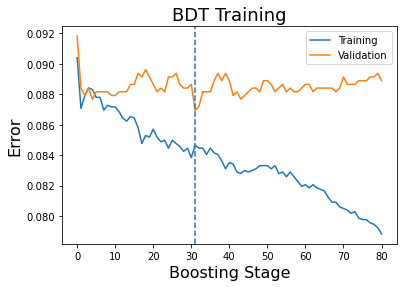

In [29]:
plt.plot(progress['validation_0']['error'], label='Training')
plt.plot(progress['validation_1']['error'], label ='Validation')
plt.axvline(np.argmin(progress['validation_1']['error']), ls = '--')
plt.xlabel('Boosting Stage', fontsize = 16)
plt.ylabel('Error', fontsize = 16)
plt.title('BDT Training', fontsize = 18)
plt.legend()